Настройте оси на любом из предыдущих графиков, установив диапазоны значений и
добавив метки.


In [1]:
# создание венвы
!python3 -m venv .venv

In [2]:
# даём право на редактирование
!chmod +x .venv/bin/activate

In [3]:
# активируем венву
!source .venv/bin/activate

In [ ]:
# деактивируем венву
!.venv/bin/activate deactivate

In [ ]:
# проверяем работает ли венва
!which python3
!which pip

In [ ]:
# устанавливаем либу
!pip install matplotlib

In [ ]:
# проверяем есть ли либа
!pip list

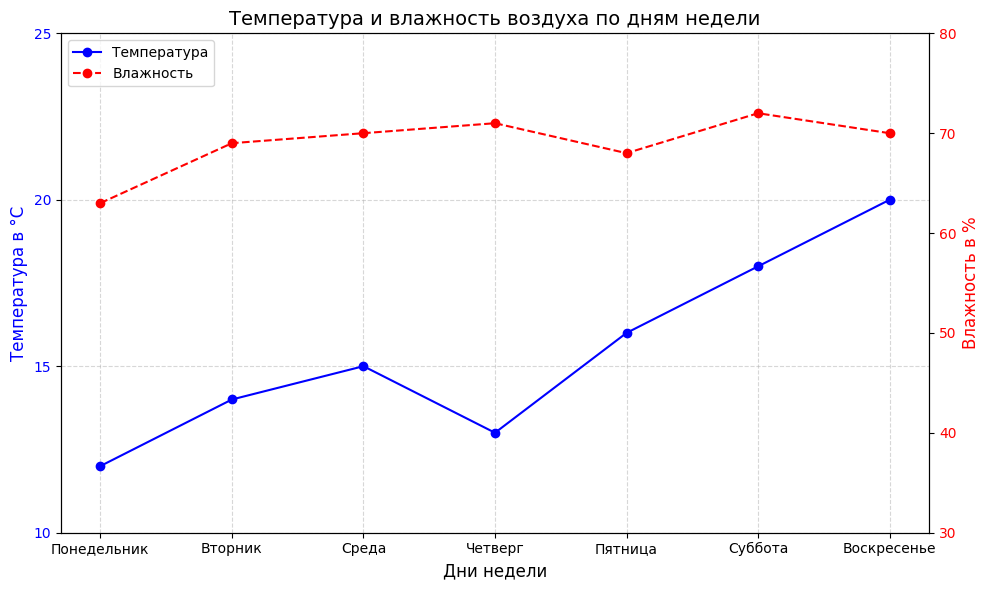

In [ ]:
# импорт либ
import logging
import matplotlib.pyplot as plt

# настраиваем логгирование
logging.basicConfig(filename='log.txt', level=logging.INFO)
log = logging.getLogger(__name__)

def drow_graph(days: list, temperatures: list, humidity: list) -> None:
    
    '''
    Рисует графики температуры и влажности
    
    :param days: list - список дней недели
    :param temperatures: list - список температуры за каждый день недели
    :param humidity: list - список влажности за каждый день недели
    '''
       
    try:
        # создаём график
        ax1 = plt.subplots(figsize=(10, 6))[1] # первая ось Y привязанная к значениям X

        # график температуры
        ax1.plot(days, temperatures, marker='o', linestyle='-', color='b', label='Температура') # определяем вид первого графика
        ax1.set_xlabel('Дни недели', fontsize=12) # определяем подпись к оси X
        ax1.set_ylabel('Температура в °C', fontsize=12, color='b') # определяем подпись ко второй оси Y
        ax1.tick_params(axis='y', labelcolor='b') # определяем подпись цены деления

        # настройка оси температуры
        ax1.set_ylim(10, 25) # диапазон от 10 до 25 градусов
        ax1.set_yticks(range(10, 26, 5)) # метки оси Y каждые 5

        # общая настройка
        ax1.set_title('Температура и влажность воздуха по дням недели', fontsize=14) # общая подпись к графику
        ax1.grid(visible=True, linestyle='--', alpha=0.5) # сетка графика

        # график влажности
        ax2 = ax1.twinx() # вторая ось Y привязанная к значениям X
        ax2.plot(days, humidity, marker='o', linestyle='--', color='r', label='Влажность') # определяем вид второго графика
        ax2.set_ylabel('Влажность в %', fontsize=12, color='r') # определяем подпись ко второй оси Y
        ax2.tick_params(axis='y', labelcolor='r') # определяем подпись цены деления

        # настройка оси влажности
        ax2.set_ylim(50, 80)  # диапазон от 50 до 80%
        ax2.set_yticks(range(30, 81, 10))  # метки оси Y каждые 10

        # объединение легенд
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print('Ошибка')
        log.error(f'Произошла ошибка: {e}')
    
def main():
    # объявляем:
    days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'] # лист дней недели
    temperatures = [12, 14, 15, 13, 16, 18, 20] # температуру за неделю
    humidity = [63, 69, 70, 71, 68, 72, 70] # влажность за неделю
    
    drow_graph(days=days, temperatures=temperatures, humidity=humidity)
    
if __name__ == '__main__':
    main()